In [3]:
import json
import numpy as np

with open('./generated_final/fasta/generated.json') as f:
    data = json.load(f)

ppls = []
bs=[]
lengths = []
for k,v in data.items():
    ppls.append(v['ppl'])
    bs.append(v['average_bfactor'])
    lengths.append(v['length'])

ppl_mean = np.mean(ppls)
ppl_std = np.std(ppls)
bfactor_mean = np.mean(bs)
bfactor_std = np.std(bs)
print(f'PPL mean: {ppl_mean}, std: {ppl_std}')
print(f'BFactor mean: {bfactor_mean}, std: {bfactor_std}')


PPL mean: 5.515951790892609, std: 0.8273501205717205
BFactor mean: 64.46425519695856, std: 10.728032114877346


In [2]:
print("Average PPL: ", sum(ppls)/len(ppls),)
print("Average B-Factor: ", sum(bs)/len(bs))
count = 0
for b in bs:
    if b >= 70:
        count += 1
print("Number of structures with average B-Factor >= 70: ", count)

Average PPL:  5.5159517908926095
Average B-Factor:  64.46425519695852
Number of structures with average B-Factor >= 70:  153


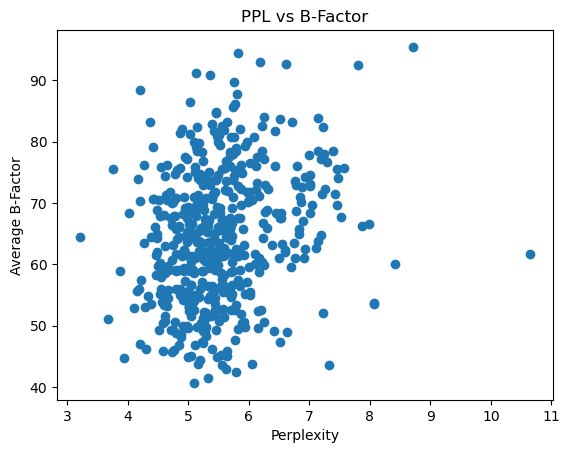

In [4]:
# Make a scatter plot of PPL vs B-Factor
import matplotlib.pyplot as plt
plt.scatter(ppls, bs)
plt.xlabel('Perplexity')
plt.ylabel('Average B-Factor')
plt.title('PPL vs B-Factor')
plt.show()


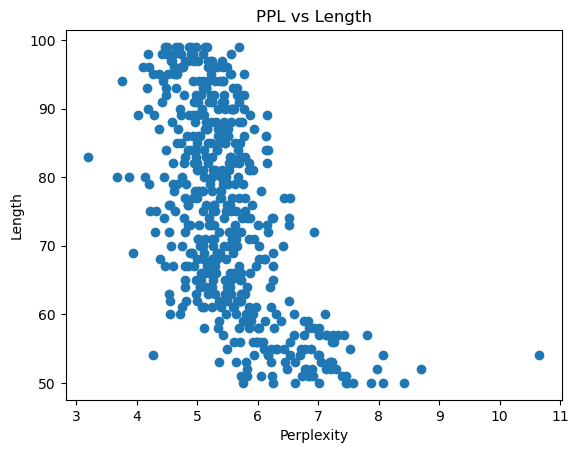

In [5]:
# Make a scatter plot of PPL vs Length
plt.scatter(ppls, lengths)
plt.xlabel('Perplexity')
plt.ylabel('Length')
plt.title('PPL vs Length')
plt.show()

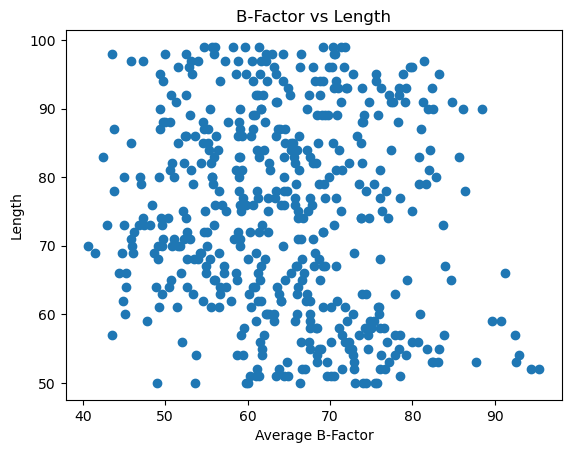

In [6]:
# Make a scatter plot of B-Factor vs Length
plt.scatter(bs, lengths)
plt.xlabel('Average B-Factor')
plt.ylabel('Length')
plt.title('B-Factor vs Length')
plt.show()

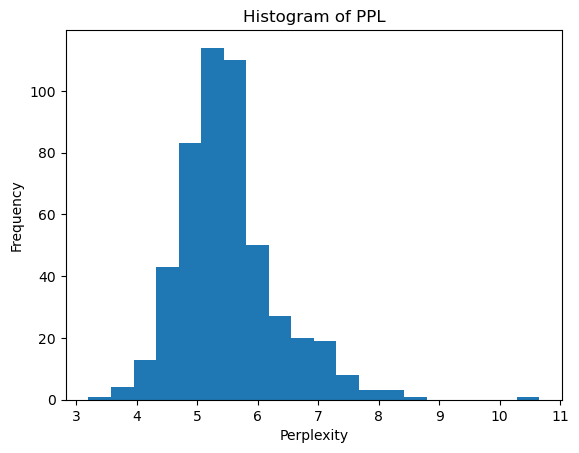

In [7]:
# Make a histogram of PPL
plt.hist(ppls, bins=20)
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.title('Histogram of PPL')
plt.show()

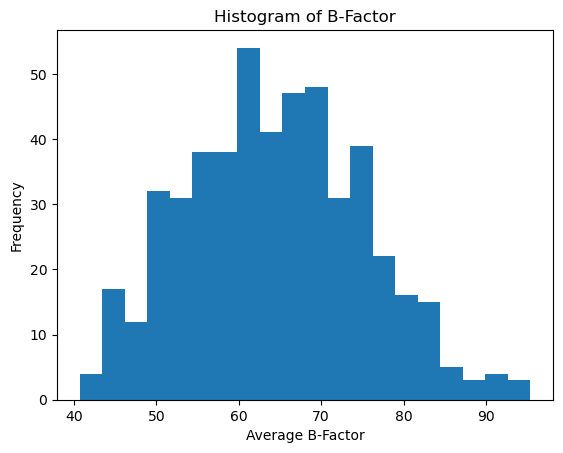

In [8]:
# Make a histogram of B-Factor
plt.hist(bs, bins=20)
plt.xlabel('Average B-Factor')
plt.ylabel('Frequency')
plt.title('Histogram of B-Factor')
plt.show()

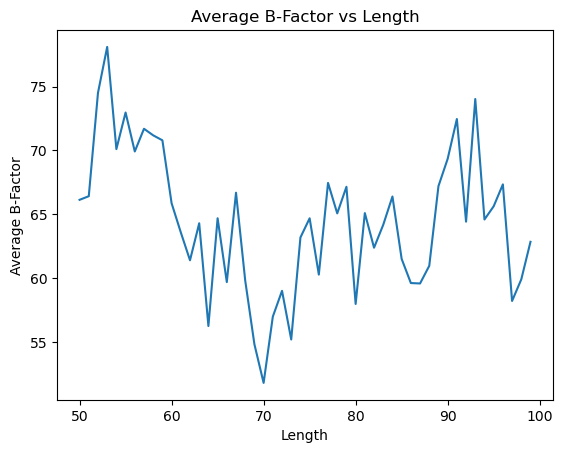

In [9]:
# Average B-Factor of different lengths
lengths = list(set(lengths))
lengths.sort()
avg_bs = []
for l in lengths:
    bs = [v['average_bfactor'] for k,v in data.items() if v['length'] == l]
    avg_bs.append(sum(bs)/len(bs))
plt.plot(lengths, avg_bs)
plt.xlabel('Length')
plt.ylabel('Average B-Factor')
plt.title('Average B-Factor vs Length')
plt.show()

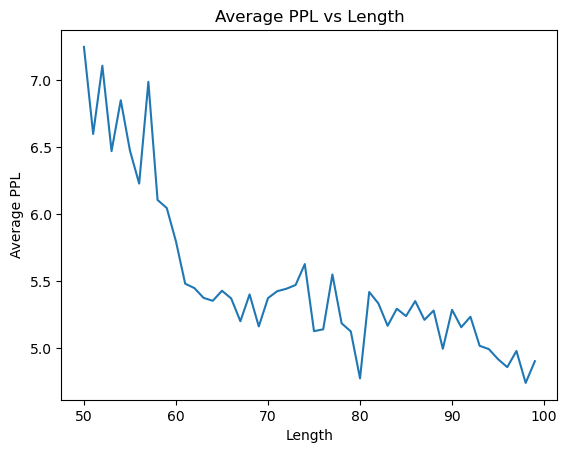

In [10]:
# Average PPL of different lengths
lengths = list(set(lengths))
lengths.sort()
avg_ppls = []
for l in lengths:
    ppls = [v['ppl'] for k,v in data.items() if v['length'] == l]
    avg_ppls.append(sum(ppls)/len(ppls))
plt.plot(lengths, avg_ppls)
plt.xlabel('Length')
plt.ylabel('Average PPL')
plt.title('Average PPL vs Length')
plt.show()

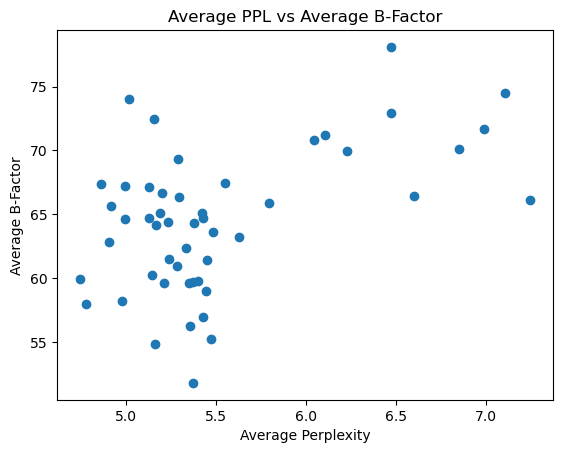

In [11]:
# Scatter plot of Average PPL vs Average B-Factor for different lengths
plt.scatter(avg_ppls, avg_bs)
plt.xlabel('Average Perplexity')
plt.ylabel('Average B-Factor')
plt.title('Average PPL vs Average B-Factor')
plt.show()
